In [1]:
"""
Do some of the examples found here: 
https://www.electronics-tutorials.ws/category/amplifier
https://www.electronics-tutorials.ws/amplifier/common-collector-amplifier.html

27-Nov-22   CBL Original
"""
import numpy as np
import matplotlib.pyplot as plt
import math

This is the circuit we are trying to analyze:
<img src="pics/amp113.gif"> 
This is a common emitter amplifier with some NPN transistor. We could use something like a 2N3904 for a test. 

In [7]:
def VoltageDivider(Vcc, R1, R2):
    """ 
    Returns the voltage going into the base of the above diagram. 
    Total resistance is R1+R2. The current through this chain is Vcc/(R1+R2). This ignores the base current. 
    The design should have the current through R2 ~ 10x Ib at min. 
    """
    V_b = Vcc * R2/(R1+R2)
    return V_b

Overall the transistor is treated as an ideal device. As such $I_E = I_C + I_B$. However, the beta involved should be such that $I_B$ should be very low relative to $I_C$ or $I_E$. Roughly there is a 0.6 to 0.7 volt forward bias required to get this running, $V_{BE}$ <br>

The resistance can be modeled by $r_e = 25mV/I_e $ where the 25 is the thermal voltage at room temperture. $I_b$ flows through the Base-Emitter junction and will act like a voltage divider with $R_E$ as the second resistor. In this case the ratio is so low that $V_{out} ~ V_{in}$ and this makes an emitter follower. 
<hr>
Common collector Voltage gain: <br> 
$V_{out} = {V_{in} R_E \over {r_e + R_E}} $
<br> 
therefore: <br> 
$A_V = {V_{out}\over{V_{in}}} = {I_e R_E\over{I_e(r_e + R_E)}}$
<br> but $R_E >> r_e$ <br>
$A_V \approx 1$

In [47]:
def EmitterResistance(VB, VC, RE):
    """
    @VB - Base voltage
    @VC - Collector voltage
    """
    V_BE = 0.7    # Volts, kinda fixed based on transistor fabrication
    VE = VB - V_BE
    print("VE = ", VE)
    V_CE = VC - VE
    IE = VE/RE
    rv = 25.0e-3/IE + RE  # thermal voltage value plus emitter resistor value
    #print("Emitter current = ", IE, " Emitter Resistance = ", RE)
    return rv

In [48]:
def Example1():
    Vcc = 12.  # volts
    R1 = 5600  # ohms
    R2 = 6800  # ohms
    RE = 4700. # ohms
    VB = VoltageDivider(Vcc, R1, R2)
    print("VB = ", VB)
    """ 
    VC basically is VCC
    We are defining the forward voltage as 0.7V
    """
    RE = EmitterResistance(VB, Vcc, RE)
    IC = VB/RE
    print("Collector Current = ", IC)


In [49]:
Example1()

VB =  6.580645161290323
VE =  5.880645161290323
Collector Current =  0.0013942101544283105


VE =  [-0.7 -0.2  0.3  0.8  1.3  1.8  2.3  2.8  3.3  3.8  4.3  4.8  5.3  5.8
  6.3  6.8  7.3  7.8  8.3  8.8  9.3  9.8 10.3 10.8]


Text(0, 0.5, 'Collector Current(A)')

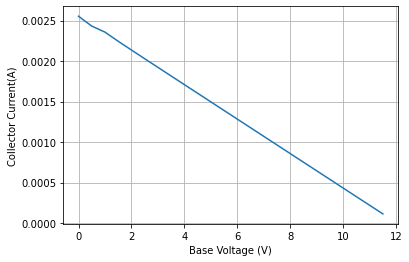

In [50]:
# Plot a load line based on varying the base voltage. 
Vcc = 12.0
RE  = 4700.0 
IC_sat = Vcc/RE
vin = np.arange(0,Vcc, 0.5)
re  = EmitterResistance(vin, Vcc, RE)
ic  = vin/re
plt.plot(vin,IC_sat-ic)
plt.grid(True)
plt.xlabel("Base Voltage (V)")
plt.ylabel("Collector Current(A)")

This is the equivalent of a load line. all of the above has been for a DC operation. <br> 
Lets try an ac analysis. But we will add a capacitor at the base and at the emitter as DC blocks. In AC operation, what does the input impedance loo like? Should be high.<br>
From the prespective of impedance - everything is in parallel. We will also introduce a load resistance $R_L$ after the output blocking capacitor.<br> 
When starting the analysis, we assume that C1 (input) and C2 (output) are shorts. (Assume that ${1\over{\omega C}} << 1$) Under these conditions then...<br>
$R_B = R_1 \parallel R_2$ <br>
$R_e = R_E \parallel R_L $ <br>
$\beta = {I_C\over{I_B}} \therefore I_C = \beta I_B$ <br> 
$I_E \sim I_C = \beta I_B$ <br>
$V_{IN} = V_B = V_{BE} + V_E $ <br>
... using approximations... <br> 
$Z_{base} = \beta (R_e + r_e) $

In [85]:
def Example2():
    Vcc = 12.  # volts
    R1 = 5600  # ohms
    R2 = 6800  # ohms
    RE = 4700. # ohms
    RL = 1.0e4 # ohms
    Beta = 100 # unitless
    #
    VB = VoltageDivider(Vcc, R1, R2)
    RE = EmitterResistance(VB, Vcc, RE)
    IC = VB/RE
    r_e = 25e-3/IC
    print("r_e", r_e)
    # Equivalent load resistance Parallel
    Re = RE*RL/(RE+RL)
    print("Equivalant load resistance: ", Re)
    Z_base = Beta * (r_e+Re)
    print("base impedence:", Z_base)
    # Amplifier input impedance RBias parallel with Zbase
    Rbias = R1*R2/(R1+R2) 
    Zin = Rbias * Z_base/(Rbias + Z_base)
    print("input impedence:", Rbias, " ", Zin)
    #
    # and finally output impedance. 
    #
    Z_device = r_e + (Rbias/(Beta+1.0))
    Zout = Re * Z_device/(Re+Z_device)
    print("output Impedance:", Zout)

In [86]:
Example2()

VE =  5.880645161290323
r_e 17.93129961117744
Equivalant load resistance:  3206.5128784653357
base impedence: 322444.41780765133
input impedence: 3070.967741935484   3041.995707768541
output Impedance: 47.619081883242195
